In [62]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import r2_score
%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [3]:
data = pd.read_csv('DEOK_hourly.csv')
data['Datetime']=pd.to_datetime(data['Datetime'])
data.set_index('Datetime', inplace=True)

In [4]:
data.head()

,DEOK_MW
Datetime,
2012-12-31 01:00:00,2945.0
2012-12-31 02:00:00,2868.0
2012-12-31 03:00:00,2812.0
2012-12-31 04:00:00,2812.0
2012-12-31 05:00:00,2860.0


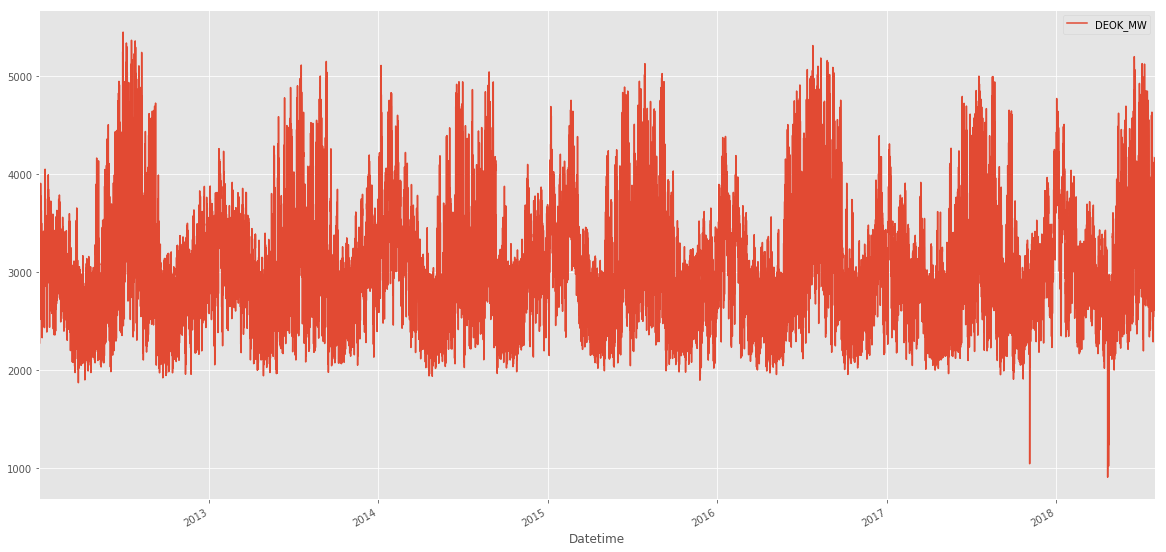

In [5]:
data.plot()

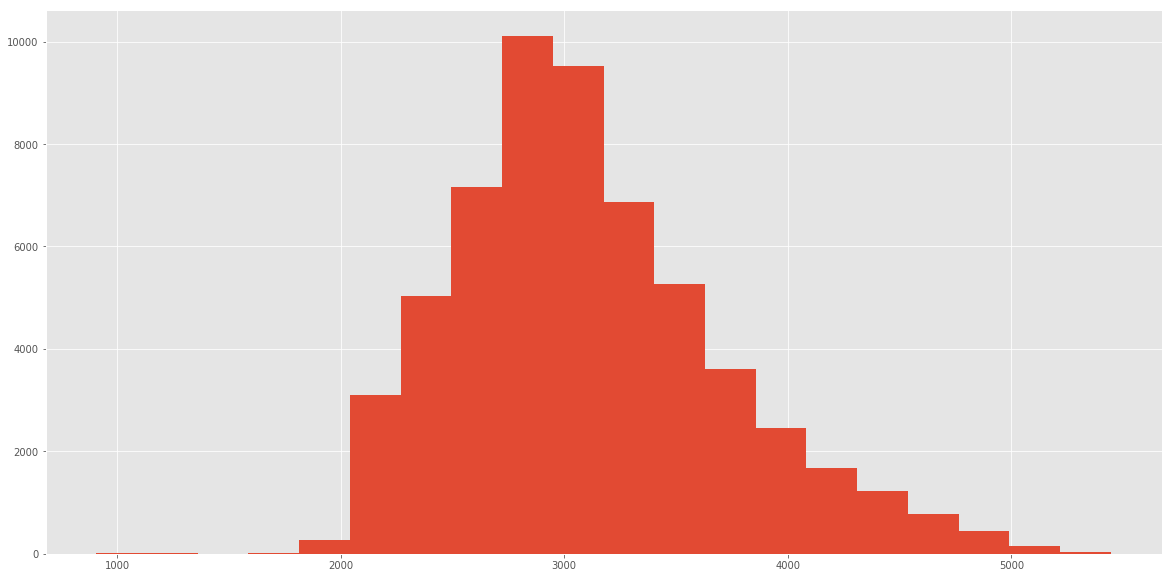

In [9]:
data['DEOK_MW'].hist(bins=20)

In [39]:
one, two, three = np.split(
        data['DEOK_MW'].sample(
        frac=1), [int(.25*len(data['DEOK_MW'])),
        int(.75*len(data['DEOK_MW']))])

In [34]:
mean1, mean2, mean3 = one.mean(), two.mean(), three.mean()
var1, var2, var3 = one.var(), two.var(), three.var()

In [40]:
print mean1, mean2, mean3
print var1, var2, var3

3093.27497575 3107.45445099 3112.20124697
353154.655416 363558.421407 358899.692558


In [41]:
from statsmodels.tsa.stattools import adfuller

In [44]:
adf_test = adfuller(data['DEOK_MW'])

In [45]:
adf_test

(-14.913267801069782,
 1.4477674072055658e-27,
 57,
 57681,
 {'1%': -3.4304633751328555,
  '10%': -2.5667966716717614,
  '5%': -2.8615901096273602},
 669611.23911962728)

In [48]:
print "ADF = " + str(adf_test[0])
print "p-value = " +str(adf_test[1])

ADF = -14.9132678011
p-value = 1.44776740721e-27


/vagrant/pythondata/env/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  """Entry point for launching an IPython kernel.


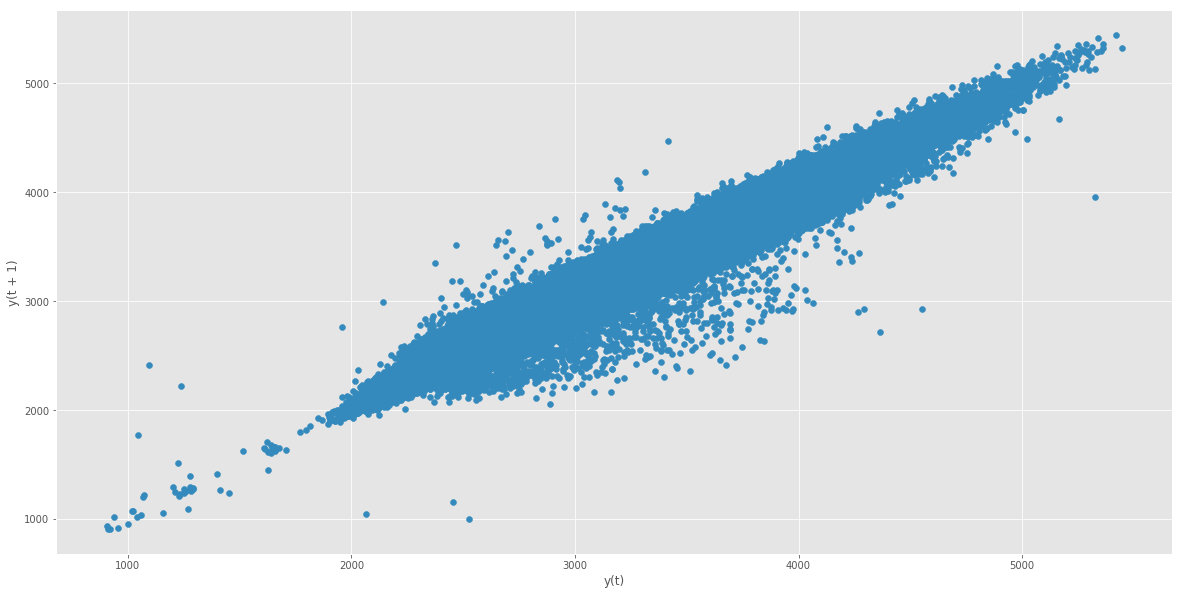

In [50]:
pd.tools.plotting.lag_plot(data['DEOK_MW'])

In [149]:
#create train/test datasets
X = data['DEOK_MW'].dropna()

train_data = X[1:len(X)-12]
test_data = X[len(X)-12:]


In [150]:
#train the autoregression model
model = AR(train_data)
model_fitted = model.fit()


/vagrant/pythondata/env/local/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [151]:
print('The lag value chose is: %s' % model_fitted.k_ar)


The lag value chose is: 59


In [152]:
# make predictions 
predictions = model_fitted.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)


# create a comparison dataframe
compare_df = pd.concat(
    [data['DEOK_MW'].reset_index().tail(12),
    predictions], axis=1).rename(
    columns={'DEOK_MW': 'actual', 0:'predicted'})
compare_df=compare_df[['actual', 'predicted']].dropna()

/vagrant/pythondata/env/local/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [153]:
predictions

57726    3869.472137
57727    3805.973745
57728    3796.575978
57729    3797.108515
57730    3890.598661
57731    4097.286867
57732    4260.151854
57733    4310.203028
57734    4307.501185
57735    4252.261197
57736    4146.984356
57737    4053.067806
dtype: float64

In [154]:
compare_df

,actual,predicted
57727,3865.0,3805.973745
57728,3824.0,3796.575978
57729,3766.0,3797.108515
57730,3776.0,3890.598661
57731,3885.0,4097.286867
57732,4200.0,4260.151854
57733,4393.0,4310.203028
57734,4426.0,4307.501185
57735,4419.0,4252.261197
57736,4355.0,4146.984356


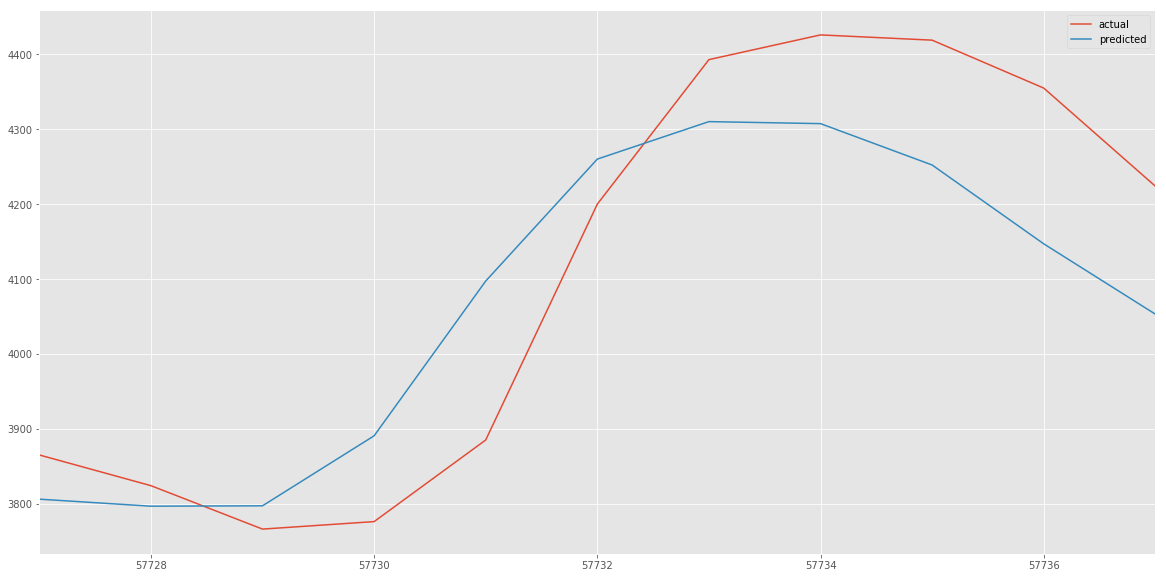

In [155]:
compare_df.plot()

In [158]:
r2 = r2_score(compare_df.actual, compare_df.predicted)

In [160]:
r2

0.75819470059241667